# Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori

# Import Dataset

In [4]:
data = pd.read_csv('Groceries_dataset.csv')
print("DataFrame shape :", data.shape)
data.head()

DataFrame shape : (38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Format Data Waktu

In [26]:
data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y")
data["Date"].dtype

dtype('<M8[ns]')

In [29]:
data["month"] = data['Date'].dt.month
data["day"] = data['Date'].dt.weekday
data["hour"] = data['Date'].dt.hour
data.head()

,Member_number,Date,itemDescription,month,day,hour,month_name
0,1808,2015-07-21,tropical fruit,7,1,0,<bound method PandasDelegate._add_delegate_acc...
1,2552,2015-01-05,whole milk,1,0,0,<bound method PandasDelegate._add_delegate_acc...
2,2300,2015-09-19,pip fruit,9,5,0,<bound method PandasDelegate._add_delegate_acc...
3,1187,2015-12-12,other vegetables,12,5,0,<bound method PandasDelegate._add_delegate_acc...
4,3037,2015-02-01,whole milk,2,6,0,<bound method PandasDelegate._add_delegate_acc...


# Menampilkan 10 item paling laris

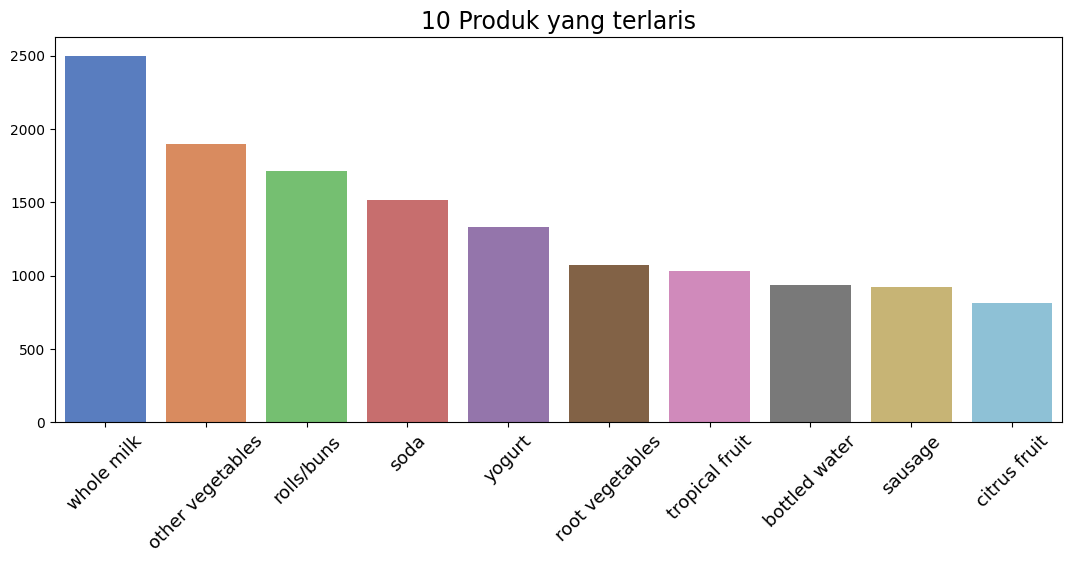

In [12]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["itemDescription"].value_counts()[:10].index,
            y = data["itemDescription"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Produk yang terlaris', size = 17)
plt.show()

# Transaksi tiap bulan

Text(0.5, 1.0, 'Jumlah transaksi tiap bulan dari mei - april')

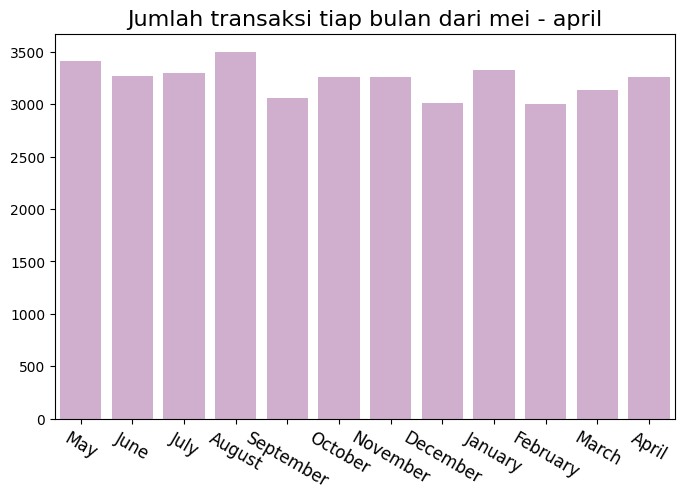

In [32]:
data_perbulan = data.groupby('month')['Member_number'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["May", "June", "July", "August", "September", "October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color = "#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("Jumlah transaksi tiap bulan dari mei - april", size = 16)

# Transaksi per hari

Text(0.5, 1.0, 'Total Transaksi')

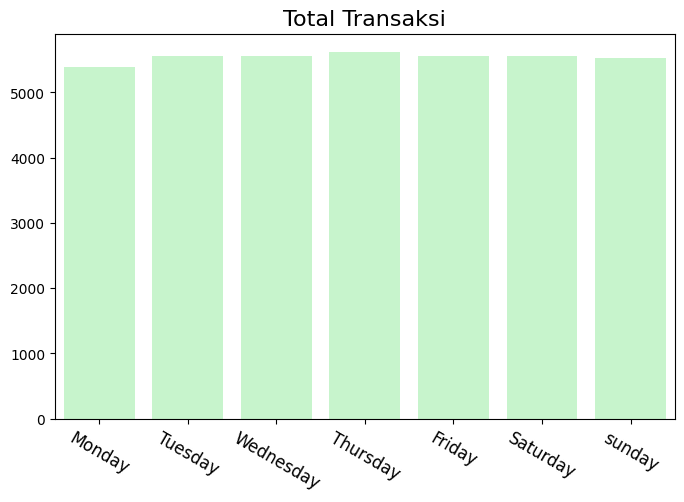

In [33]:
data_perday = data.groupby('day')['Member_number'].count()

plt.figure(figsize = (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "sunday"],
    y = data_perday.values, color = "#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi per hari", size = 16)

# Data Preparation

In [35]:
data["itemDescription"] = data["itemDescription"].apply(lambda item: item.lower())

In [36]:
data["itemDescription"] = data["itemDescription"].apply(lambda item: item.strip())

In [37]:
data = data[["Member_number", "itemDescription"]].copy()
data.head(10)

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
5,4941,rolls/buns
6,4501,other vegetables
7,3803,pot plants
8,2762,whole milk
9,4119,tropical fruit


In [39]:
item_count = data.groupby(["Member_number", "itemDescription"])["itemDescription"].count().reset_index(name="Count")
item_count.head(10)

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
5,1000,salty snack,1
6,1000,sausage,2
7,1000,semi-finished bread,1
8,1000,soda,1
9,1000,whole milk,2


In [40]:
item_count_pivot = item_count.pivot_table(index = 'Member_number', columns = 'itemDescription', values = 'Count', aggfunc = 'sum').fillna(0)
print("Ukuran Dataset : ", item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset :  (3898, 167)


itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [41]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [42]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 1:
    return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
print("Ukuran Dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("Jumlah items : ", item_count_pivot.shape[1])

Ukuran Dataset :  (3898, 167)
Jumlah Transaksi :  3898
Jumlah items :  167


In [44]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support = support, use_colnames = True)
frequent_items.sort_values("support", ascending = False).head(10)

,support,itemsets
113,0.458184,(whole milk)
68,0.376603,(other vegetables)
83,0.349666,(rolls/buns)
93,0.313494,(soda)
114,0.282966,(yogurt)
105,0.233710,(tropical fruit)
84,0.230631,(root vegetables)
5,0.213699,(bottled water)
88,0.206003,(sausage)
1038,0.191380,"(other vegetables, whole milk)"


In [46]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
6937,"(domestic eggs, meat)",(whole milk),0.010262,0.784314,1.711789
5626,"(fruit/vegetable juice, chocolate)",(whole milk),0.010775,0.750000,1.636898
15144,"(other vegetables, bottled water, yogurt, roll...",(whole milk),0.010518,0.745455,1.626978
11618,"(bottled water, pip fruit, yogurt)",(whole milk),0.010262,0.740741,1.616689
11982,"(yogurt, brown bread, rolls/buns)",(whole milk),0.012827,0.735294,1.604802
11114,"(bottled water, other vegetables, brown bread)",(whole milk),0.012057,0.723077,1.578138
11086,"(yogurt, bottled beer, rolls/buns)",(whole milk),0.013853,0.720000,1.571422
12792,"(yogurt, soda, curd)",(whole milk),0.010775,0.711864,1.553666
15204,"(other vegetables, shopping bags, yogurt, roll...",(whole milk),0.010005,0.709091,1.547613
12878,"(domestic eggs, sausage, rolls/buns)",(whole milk),0.010518,0.706897,1.542823
